# <center>Statistical Analysis on Cardiac Failure</center>

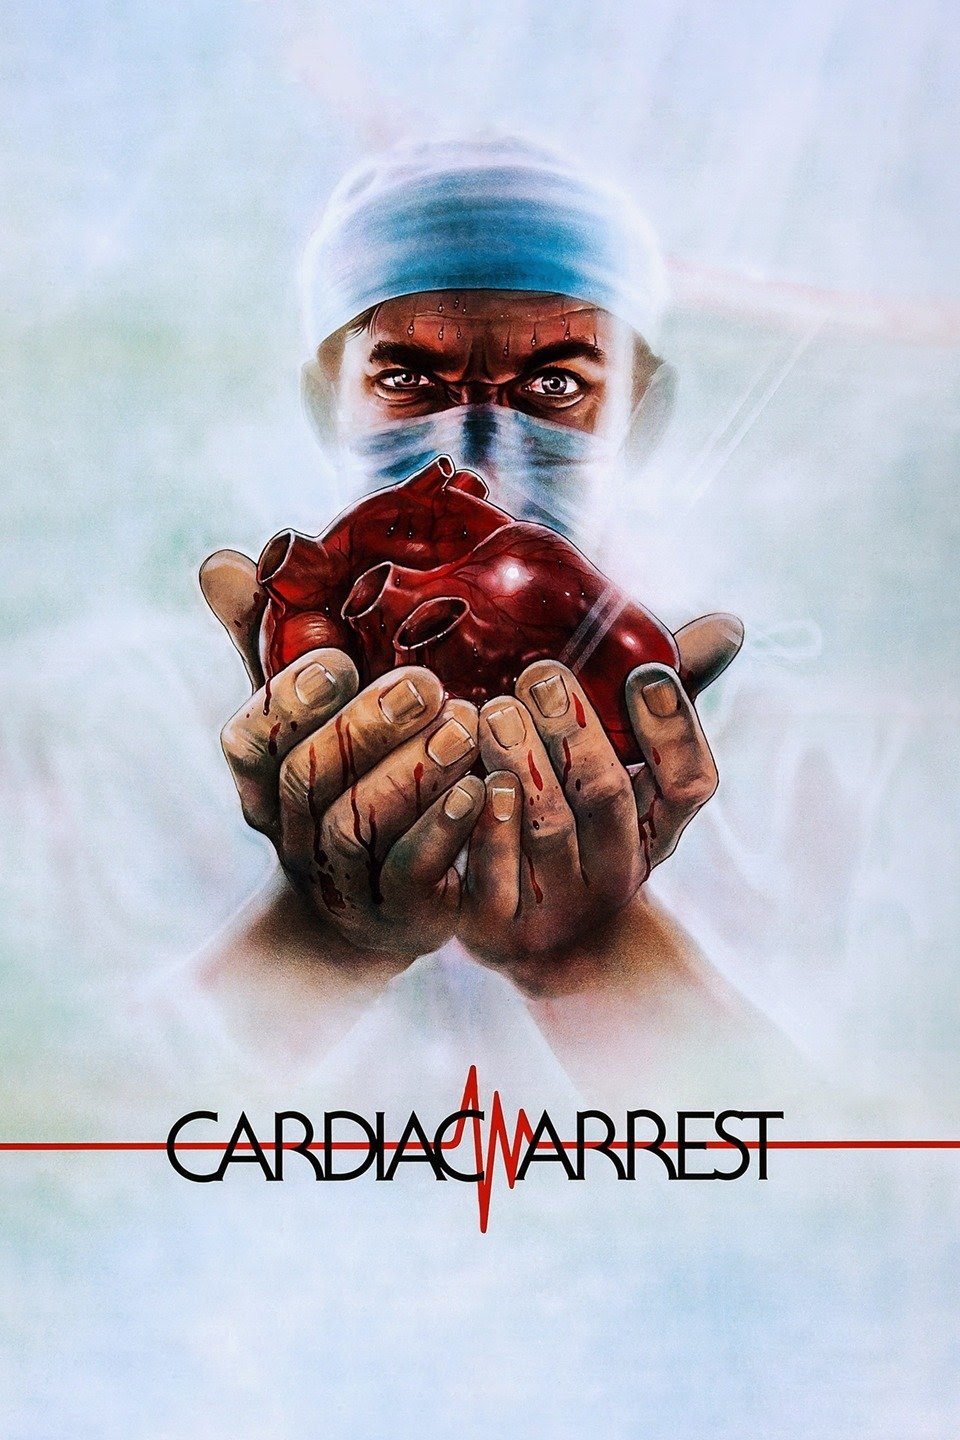

In [1]:
from IPython.display import Image
Image("Cardiac Arrest.jpg")

# Cardiac Failure

Cardiac Failure occurs when the heart is not able to pump enough blood to the body.

Cardiac Failure are only a subgroup of all the cardiovascular diseases that comprehend also coronary heart diseases (heart attacks), cerebrovascular diseases (strokes) and other pathologies that altogether kill every year approximately 17 million people around the world.

Statistical Tools applied to medical records can be useful to predict the survival of a patient, highlighting the features to understand which are risk factors, possibly undetectable by doctors.

In this notebook the analysis will be done starting from an EDA to understand the dataset and applying some Hypothesis to be able to learn properly from it.

Then will follow a number of Statistical models trained on the dataset, aiming to predict the survival of patients that suffered Cardiac Failure.

The results are presented at the end of the notebook.

# Table of Contents

1.  Dataset Description

2.  Importing Libraries

3.  Dataset

4.  Exploratory Data Analysis (EDA)

5.  Data Cleaning

6.  Numerical Data Analysis

7.  Descriptive Statistics

8.  Measure of Dispersion

9.  Measure of Shape

10. Normality Test

11. Shapiro Test

12. Pearson Test of Correlation

13. Hypothesis Testing - 
    Survival Prediction Classifiers
    
    1. Ejection Fraction vs Chances of Survival
    
    2. Serum Creatinine vs Chance of Survival
    
    3. Sodium Serum vs Chance of Survival
    
14. Test on Risk of Heart Failure
 
    1. Test on Ejection Fraction
    
    2. Test on Serum Creatinine
    
    3. Test on Serum Sodium
    
15. Test of Claim within Normal Level
    
    1. Ejection Fraction within Normal Level
    
    2. Serum Creatinine within Normal Level
    
    3. Serum Sodium within Normal Level
    
16. Survival Prediction Plot
    
    1. Serum Creatinine vs Ejection Fraction
    
    2. Serum Sodium vs Ejection Fraction
    
17. Test of Simulation

18. Conclusion for Statistical Analysis

# Dataset Description


<b>Age</b> Age of the patient in Years [40,..., 95]

<b>Anaemia</b> Decrease of red blood cells or hemoglobin

<b>High blood pressure</b> If a patient has hypertension

<b>Creatinine phosphokinase</b> Level of the CPK enzyme in the blood mcg/L [23,..., 7861] (CPK)

<b>Diabetes</b> If the patient has diabetes 

<b>Ejection fraction</b> Percentage of blood leaving Percentage [14,..., 80] the heart at each contraction

<b>Sex</b> Male and Female

<b>Platelets</b> Platelets counts in the blood 

<b>Serum creatinine</b> Level of creatinine in the blood mg/dL [0.50,..., 9.40]

<b>Serum sodium</b> Level of sodium in the blood mEq/L [114,..., 148]

<b>Smoking</b> If the patient smokes 

<b>Time</b> Follow-up period Days [4,...,285]

<b>Death Event</b> If the patient died during the follow-up period 

# Importing Library

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import random 
import statistics
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats import shapiro
from statsmodels.stats import power
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Loading Data

In [101]:
hdata=pd.read_csv('heart_failure_clinical_records.csv')
hdata.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# EDA

Checking size & Variable type of data.

In [102]:
hdata.shape

(299, 13)

The dataset has 299 observation and 13 variables.

In [103]:
hdata.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

The variables <b>Age, Creatinine Phosphokinase, Ejection Fraction, Platelets, Serum Creatinine, Serum Sodium, Time, Death Event</b> are numeric variable.

Missing value check:

In [104]:
hdata.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There is no missing data in the dataset.

### Datatype conversion:

Since age column was float data type here we change it to integer data type.

In [105]:
hdata['age'] = hdata['age'].astype(np.int64)
hdata.dtypes

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# Data Cleaning

Cleaning Column Name :

In [106]:
hdata.columns = map(lambda x : x.replace("_", " "), hdata.columns)
hdata.columns

Index(['age', 'anaemia', 'creatinine phosphokinase', 'diabetes',
       'ejection fraction', 'high blood pressure', 'platelets',
       'serum creatinine', 'serum sodium', 'sex', 'smoking', 'time',
       'DEATH EVENT'],
      dtype='object')

In [107]:
hdata.columns=hdata.columns.str.title()
hdata.columns

Index(['Age', 'Anaemia', 'Creatinine Phosphokinase', 'Diabetes',
       'Ejection Fraction', 'High Blood Pressure', 'Platelets',
       'Serum Creatinine', 'Serum Sodium', 'Sex', 'Smoking', 'Time',
       'Death Event'],
      dtype='object')

In [108]:
hdata.head()

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Replacing '0' & '1' present in Column to their respective meaning.

In [109]:
hdata['Anaemia'] = hdata['Anaemia'].replace([0,1],('NO','YES'))
hdata['Diabetes'] = hdata['Diabetes'].replace([0,1],('NO','YES'))
hdata['High Blood Pressure'] = hdata['High Blood Pressure'].replace([0,1],('NO','YES'))
hdata['Sex'] = hdata['Sex'].replace([0,1],('FEMALE','MALE'))
hdata['Smoking'] = hdata['Smoking'].replace([0,1],('NO','YES'))
hdata['Death Event'] = hdata['Death Event'].replace([0,1],('NO','YES'))

In [110]:
hdata

,Age,Anaemia,Creatinine Phosphokinase,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,75,NO,582,NO,20,YES,265000.00,1.9,130,MALE,NO,4,YES
1,55,NO,7861,NO,38,NO,263358.03,1.1,136,MALE,NO,6,YES
2,65,NO,146,NO,20,NO,162000.00,1.3,129,MALE,YES,7,YES
3,50,YES,111,NO,20,NO,210000.00,1.9,137,MALE,NO,7,YES
4,65,YES,160,YES,20,NO,327000.00,2.7,116,FEMALE,NO,8,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,NO,61,YES,38,YES,155000.00,1.1,143,MALE,YES,270,NO
295,55,NO,1820,NO,38,NO,270000.00,1.2,139,FEMALE,NO,271,NO
296,45,NO,2060,YES,60,NO,742000.00,0.8,138,FEMALE,NO,278,NO
297,45,NO,2413,NO,38,NO,140000.00,1.4,140,MALE,YES,280,NO


In [18]:
hdata.dtypes

Age                           int64
Anaemia                      object
Creatinine Phosphokinase      int64
Diabetes                     object
Ejection Fraction             int64
High Blood Pressure          object
Platelets                   float64
Serum Creatinine            float64
Serum Sodium                  int64
Sex                          object
Smoking                      object
Time                          int64
Death Event                  object
dtype: object

The variables <b>Age, Creatinine Phosphokinase, Ejection Fraction, Platelets, Serum Creatinine, Serum Sodium, Time</b> are numeric variable 

<b>Anaemia, Diabetes, High Blood Pressure, Sex,Smoking, Death Event</b> are categorical column.

# Numerical Data analysis

In [19]:
hdata_num=hdata.select_dtypes(include=['float64','int64'])
hdata_num

,Age,Creatinine Phosphokinase,Ejection Fraction,Platelets,Serum Creatinine,Serum Sodium,Time
0,75,582,20,265000.00,1.9,130,4
1,55,7861,38,263358.03,1.1,136,6
2,65,146,20,162000.00,1.3,129,7
3,50,111,20,210000.00,1.9,137,7
4,65,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62,61,38,155000.00,1.1,143,270
295,55,1820,38,270000.00,1.2,139,271
296,45,2060,60,742000.00,0.8,138,278
297,45,2413,38,140000.00,1.4,140,280


# Descriptive Statistics

In [20]:
hdata_num.describe()

,Age,Creatinine Phosphokinase,Ejection Fraction,Platelets,Serum Creatinine,Serum Sodium,Time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


Patient sample that we are studying have a <b>mean</b> Age of <b>60 years (Approx)</b> with <b>standard deviation</b> of <b>11.89 years</b> (Approx).In the dataset <b>25%</b> of patient falls under the age of <b>51 years</b> where as <b>50%</b> of data falls under the <b>60</b> year category. And <b>maximum</b> age of patient is <b>95 years</b> and <b>minimum</b> is <b>40 Years</b>.

In [21]:
hdata.describe(include='object')

,Anaemia,Diabetes,High Blood Pressure,Sex,Smoking,Death Event
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,NO,NO,NO,MALE,NO,NO
freq,170,174,194,194,203,203


The data has information on <b>299 patient,</b> in which <b>203 patient</b> have survived out which <b>203</b> were not smoking and <b>194</b> are from gender <b>Male</b>. Out of surviving patient <b>194</b> does not have high blood pressure and <b>174</b> patient does not have diabetes and <b>170</b> patient does not have Anaemia.


# Measure of Dispersion

Distribution of Data:

<b>Histogram Plot

Quantile-Quantile Plot<b>

In the histogram, the data is divided into a pre-specified number of groups called bins. The data is then sorted into each bin and the count of the number of observations in each bin is retained.

The plot shows the bins across the x-axis maintaining their ordinal relationship, and the count in each bin on the y-axis.
A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.

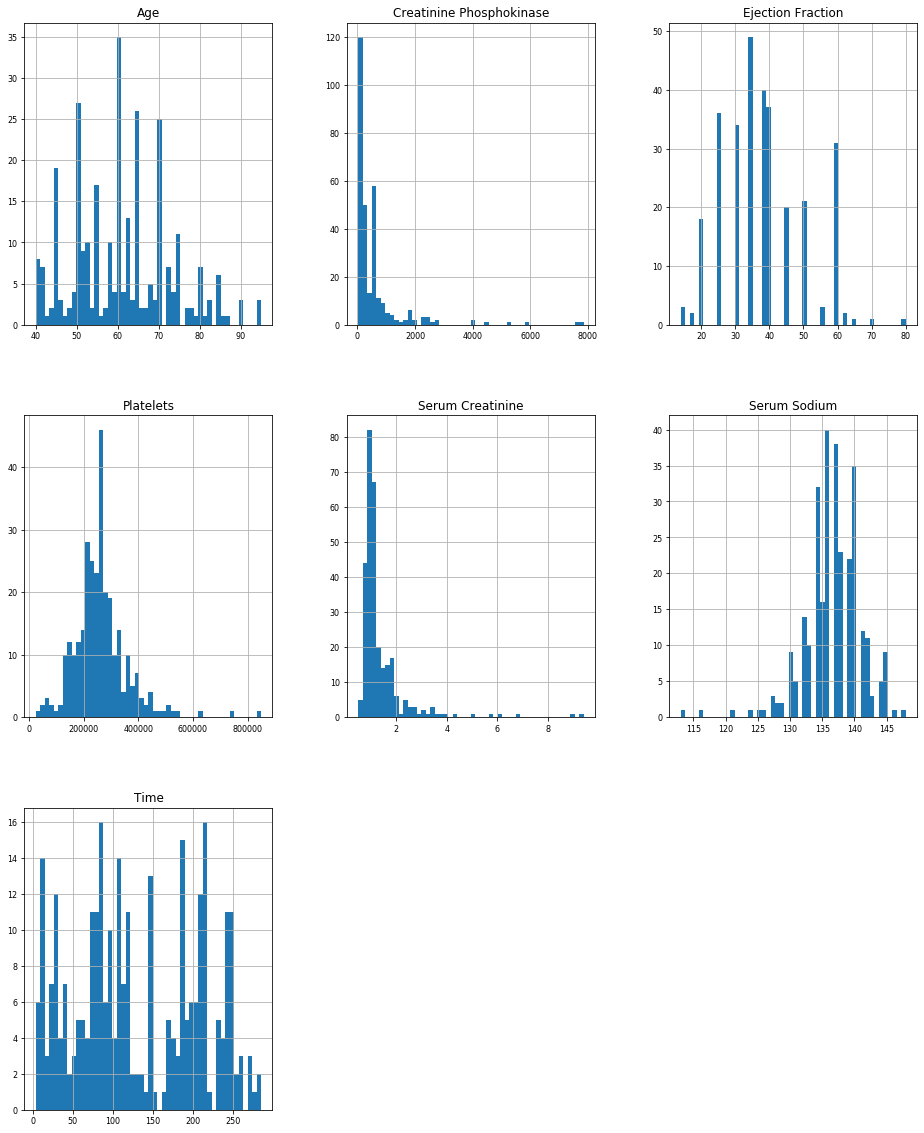

In [22]:
hdata_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

<b>Interpretation : Only platelets coloumn look normally distributed with bell shape distribution.

<b>Quantile-Quantile Plot :-</b>

stats.probplot

Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default). probplot optionally calculates a best-fit line for the data and plots the results using Matplotlib or a given plot function.

If the data is normally distributed then the points will placed over the line, it seems like <b>Age ,Platelets & Serum Sodium</b> is normally distributed

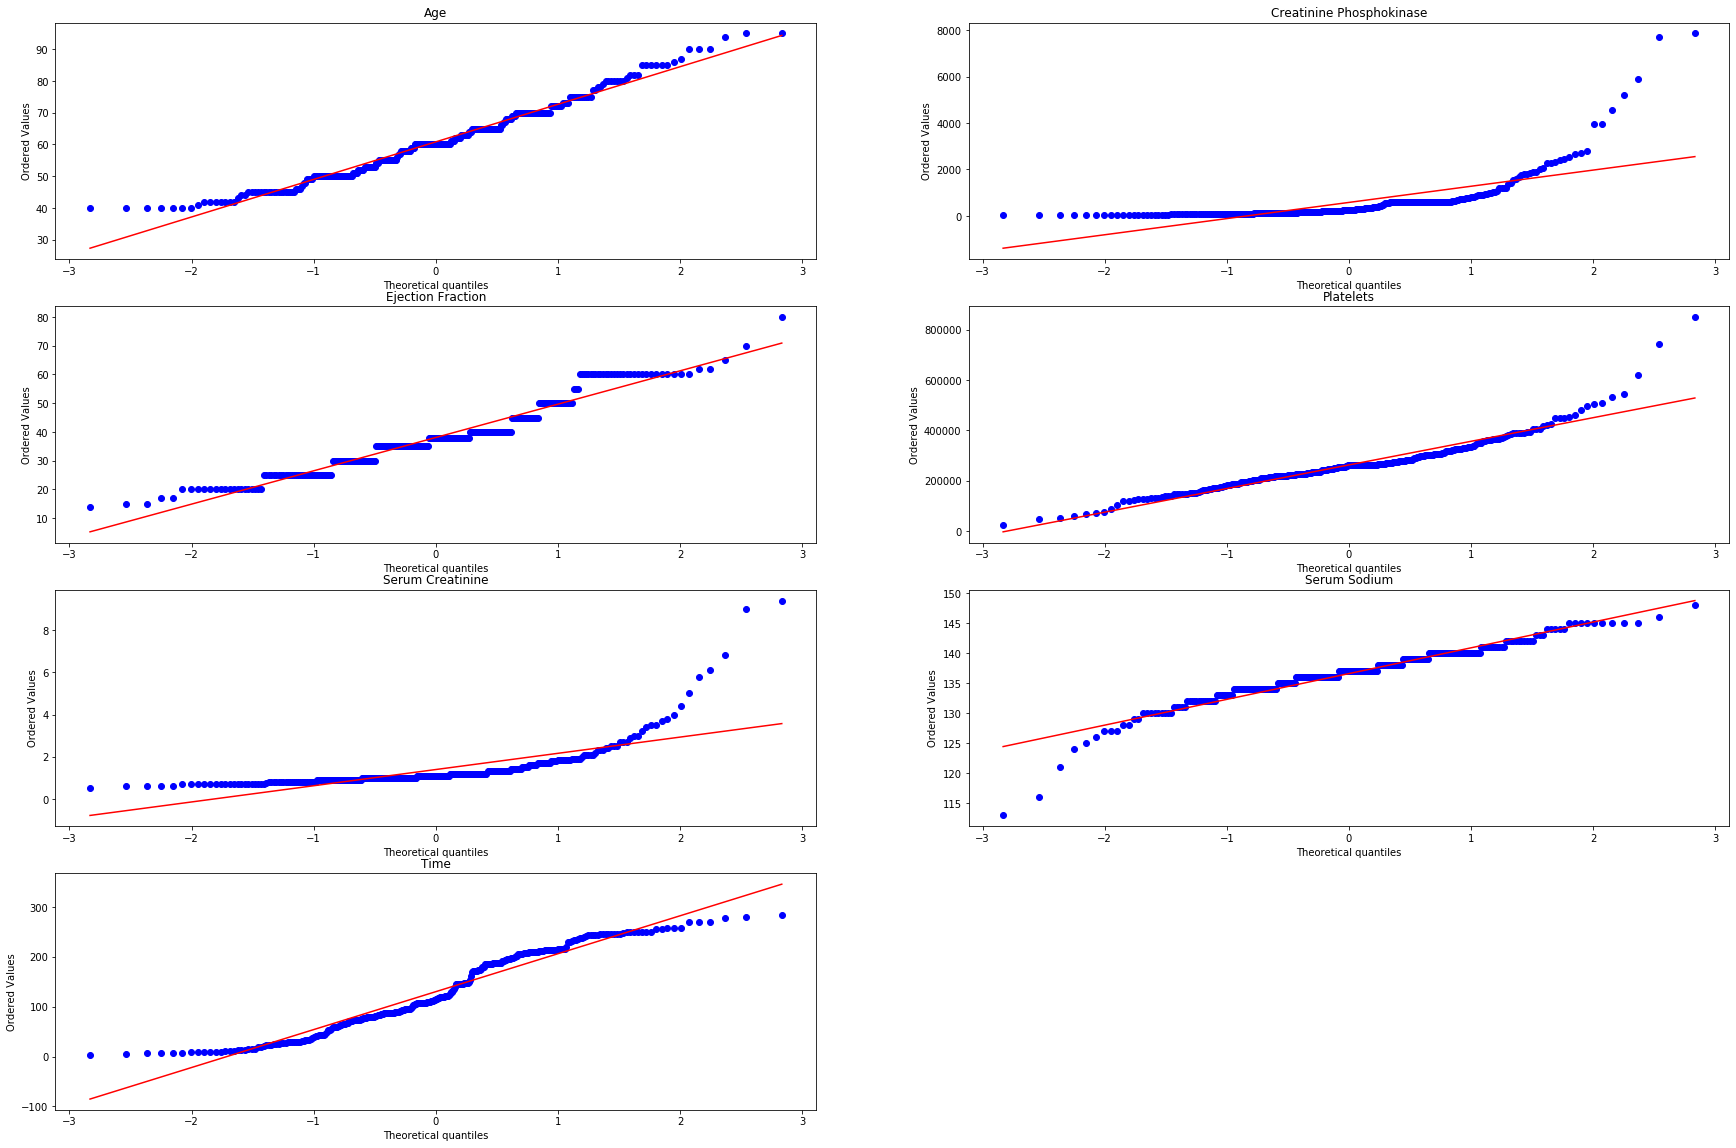

In [23]:
features = ['Age', 'Creatinine Phosphokinase',
       'Ejection Fraction', 'Platelets',
       'Serum Creatinine', 'Serum Sodium', 'Time']
plt.figure(figsize=(30,20))

for i in range(1, 8):
    ax=plt.subplot(4, 2, i)
    ax=stats.probplot(hdata[features[i-1]],dist="norm",plot=plt)
    plt.title(features[i-1])

# Measure Of Shape

<b>Skewness</b> - Skewness is the messure of symmetry or lack of symmetry.The value should be close to 0 if it's symmetrical(Normally Distributed).

<b>Kurtosis</b> - Kurtosis is another measure of shape i.e shape of the tail of the distribution whether the tail is heavy or light.

<b>Kurtosis</b> value <b>less than 3</b> is known as <b>platykurtic distribution</b> and <b>greater than 3</b> is called <b>leptokurtic distribution</b>.

In [24]:
hdata_num.skew()

Age                         0.424172
Creatinine Phosphokinase    4.463110
Ejection Fraction           0.555383
Platelets                   1.462321
Serum Creatinine            4.455996
Serum Sodium               -1.048136
Time                        0.127803
dtype: float64

Interpretation:

The variables <b>Age, Creatinine Phosphokinase, Ejection Fraction , platelets, serum Creatinine & Time</b> are positively skewed.The variable <b>serum sodium</b> is negatively skewed.


In [25]:
hdata_num.kurt()

Age                         -0.184406
Creatinine Phosphokinase    25.149046
Ejection Fraction            0.041409
Platelets                    6.209255
Serum Creatinine            25.828239
Serum Sodium                 4.119712
Time                        -1.212048
dtype: float64

<b>Interpretation:</b>

The distribution of variables <b>Age,Ejection Fraction & Time</b> are <b>platykurtic</b>.This implies that there are very less number of extreme observations in these variables.

The variables <b>Creatinine Phosphokinase, Platelets, Serum Creatinine & Serum sodium</b> are <b>leptokurtic</b>.This implies that the distribution of these variables is accumulated near mean, with the presence of more extreme observations.


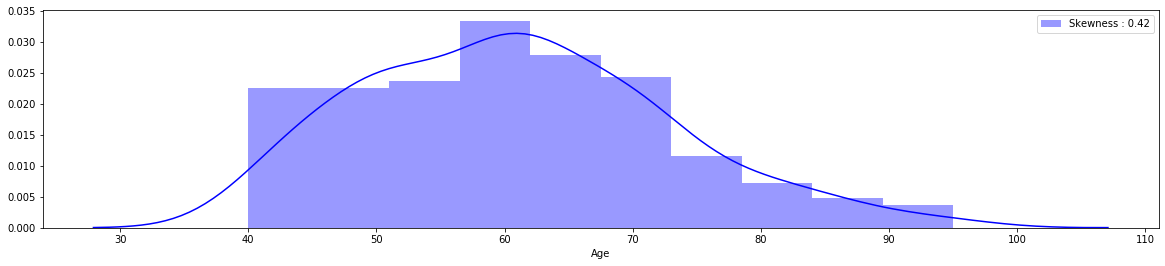

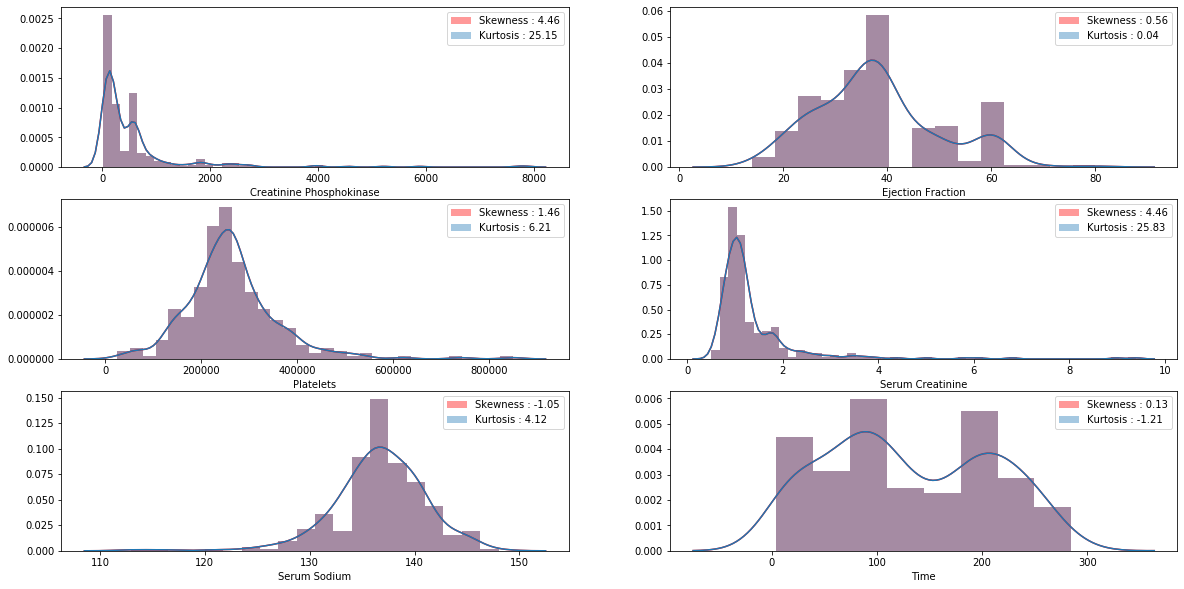

In [26]:
plt.figure(figsize=(20,4))
sns.distplot(hdata['Age'],color='blue',label='Skewness : %.2f'%hdata['Age'].skew())
plt.legend()

columns = [ 'Creatinine Phosphokinase',
       'Ejection Fraction', 'Platelets',
       'Serum Creatinine', 'Serum Sodium', 'Time']
plt.figure(figsize=(20,10))

for i in range(1, 7):
    ax=plt.subplot(3, 2, i)
    ax=sns.distplot(hdata[columns[i-1]],label='Skewness : %.2f'%hdata[columns[i-1]].skew(),color='red')
    ax=sns.distplot(hdata[columns[i-1]],label='Kurtosis : %.2f'%hdata[columns[i-1]].kurtosis())
    plt.legend(loc='best')

# Normality Test

stats.normaltest

Test whether a sample differs from a normal distribution.This function tests the null hypothesis that a sample comes from a normal distribution.

<b>Null Hypothesis - H0 : sample comes from a normal distribution(Normally Distributed)

Alternative Hypothesis- H1 : sample doesn't comes from a normal distribution(Not Normally Distributed)</b>

In [27]:
columns= ['Age', 'Creatinine Phosphokinase',
       'Ejection Fraction', 'Platelets',
       'Serum Creatinine', 'Serum Sodium', 'Time']
for i in columns:
    alpha= 0.05#singificance-level
    k2,p = stats.normaltest(hdata[i],nan_policy='omit')
    print('k2=%.3f, p=%.3f' % (k2, p))
    
    if p>alpha:
        print('{} ----- Normally distributed (Retain the null hypothesis)'.format(i))
    else:
        print('{} -----  Not normally distributed (Reject the null hypothesis)'.format(i))

k2=8.991, p=0.011
Age -----  Not normally distributed (Reject the null hypothesis)
k2=307.184, p=0.000
Creatinine Phosphokinase -----  Not normally distributed (Reject the null hypothesis)
k2=14.166, p=0.001
Ejection Fraction -----  Not normally distributed (Reject the null hypothesis)
k2=111.338, p=0.000
Platelets -----  Not normally distributed (Reject the null hypothesis)
k2=307.903, p=0.000
Serum Creatinine -----  Not normally distributed (Reject the null hypothesis)
k2=74.365, p=0.000
Serum Sodium -----  Not normally distributed (Reject the null hypothesis)
k2=174.768, p=0.000
Time -----  Not normally distributed (Reject the null hypothesis)


# Shapiro Test 

The Shapiro test evaluates a data sample and quantifies how likely it is that the data was drawn from a Normal Distribution.

<b>Null Hypothesis - H0 : sample comes from a normal distribution(Normally Distributed)

Alternative Hypothesis- H1 : sample doesn't comes from a normal distribution(Not Normally Distributed)</b>

In [28]:
columns= ['Age', 'Creatinine Phosphokinase',
       'Ejection Fraction', 'Platelets',
       'Serum Creatinine', 'Serum Sodium', 'Time']
for i in columns:
    alpha= 0.05 #singificance-level
    stat,p = stats.shapiro(hdata[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p>alpha:
        print('{} ----- Normally distributed (Retain the null hypothesis)'.format(i))
    else:
        print('{} -----  Not normally distributed (Reject the null hypothesis)'.format(i))

Statistics=0.975, p=0.000
Age -----  Not normally distributed (Reject the null hypothesis)
Statistics=0.514, p=0.000
Creatinine Phosphokinase -----  Not normally distributed (Reject the null hypothesis)
Statistics=0.947, p=0.000
Ejection Fraction -----  Not normally distributed (Reject the null hypothesis)
Statistics=0.912, p=0.000
Platelets -----  Not normally distributed (Reject the null hypothesis)
Statistics=0.551, p=0.000
Serum Creatinine -----  Not normally distributed (Reject the null hypothesis)
Statistics=0.939, p=0.000
Serum Sodium -----  Not normally distributed (Reject the null hypothesis)
Statistics=0.947, p=0.000
Time -----  Not normally distributed (Reject the null hypothesis)


# Pearson Test of Correlation

The <b>Pearson Correlation</b> test is used to analyze the strength of a relationship between two provided variables, both quantitative in nature. The value, or strength of the Pearson correlation, will be between +1 and -1.

A correlation of 1 indicates a perfect association between the variables, and the correlation is either positive or negative. Correlation coefficients near 0 indicate very weak, almost non-existent, correlations. 

In [32]:
def plt_regression(x, y, data, label_1, label_2):
    reg_plot = sns.regplot(x=x, y=y, fit_reg=True, data=data)
    plt.xlabel(label_1)
    plt.ylabel(label_2)
    plt.show()

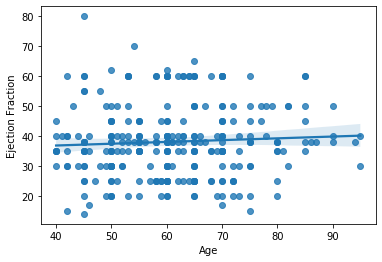

In [33]:
plt_regression('Age','Ejection Fraction',hdata,'Age','Ejection Fraction')


In [34]:
print('Assoc. - Ejection Fraction & Age')
print(pearsonr(hdata['Ejection Fraction'], hdata['Age']))

Assoc. - Ejection Fraction & Age
(0.0601954716553727, 0.2995223737896997)


<b>The first value is the direction and strength of the correlation, while the second is the P-value. The numbers suggest a fairly Weak correlation between Ejection fraction And Age.

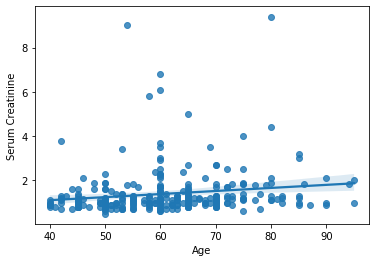

In [35]:
plt_regression('Age','Serum Creatinine',hdata,'Age','Serum Creatinine')

In [36]:
print('Assoc. - Serum Creatinine & Age')
print(pearsonr(hdata['Serum Creatinine'], hdata['Age']))

Assoc. - Serum Creatinine & Age
(0.1592369650533705, 0.005787918340711646)


<b>The first value is the direction and strength of the correlation, while the second is the P-value. The numbers suggest a nominal correlation between Serum Creatinine And Age.

# Hypothesis Testing

# Survival prediction classifiers


Survival Prediction can be counted on 3 Parameters

<b>1) Ejection Fraction</b>

<b>2) Serum Creatinine</b>
    
<b>3) Serum Sodium</b>

To check whether the Death Event has occurred due to the cause of <b>Serum Sodium, Serum Creatinine, Ejection Fraction</b>

<b>Serum Sodium Normal Level (130 - 145), Serum Creatinine (0.9-1.3=Male, 0.6-1.1=Female), Ejection Fraction (45-75)</b>


## 1. Ejection Fraction vs chances of survival

In [38]:
df_death=hdata[hdata['Death Event']=='YES']
df_surv=hdata[hdata['Death Event']=='NO']

<b>Reduction in ejection fraction could lead to death of heart patients

 H0: (mu)death-(mu)surv>=0

 H1: (mu)death-(mu)surv<0

We shall first conduct the shapiro test for normality of data.

<b>H0: Data is normally distributed

H1: Data is not normally distributed

In [39]:
print(stats.shapiro(df_death['Ejection Fraction']),stats.shapiro(df_surv['Ejection Fraction']))

(0.9265499711036682, 4.5352517190622166e-05) (0.9199293255805969, 4.704293399271364e-09)


<b>Since pvalue <<0.05 we reject H0.</b> 

Thus both datasets are not normally distributed.

Therfore we shall now proceed with non-parametric two sample test.

In [40]:
stats.mannwhitneyu(df_death['Ejection Fraction'],df_surv['Ejection Fraction'],alternative='less')

MannwhitneyuResult(statistic=6311.5, pvalue=3.684124584238869e-07)

<b>pvalue<<0.05 this falls in the rejection region.We shall reject H0.</b> 

Thus we can now conclude that mean of ejection fraction for patients who have died is lesser than for patients who have survived

[]

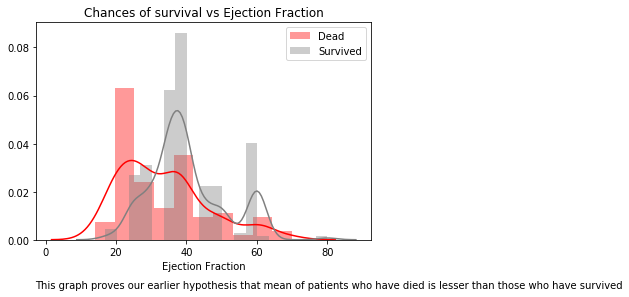

In [41]:
sns.distplot(df_death['Ejection Fraction'],color='Red')
sns.distplot(df_surv['Ejection Fraction'],color='Grey')
plt.title("Chances of survival vs Ejection Fraction")
plt.legend(('Dead','Survived'))
plt.text(-3,-0.02,'This graph proves our earlier hypothesis that mean of patients who have died is lesser than those who have survived')
plt.plot()

## 2. Serum Creatinine vs Chances of Survival

Increase in serum creatinine levels could lead to death of heart patients

 <b>H0: (mu)surv-(mu)death>=0

 H1: (mu)surv-(mu)death<0

We first conduct the normality test

In [42]:
print(stats.shapiro(df_death['Serum Creatinine']),stats.shapiro(df_surv['Serum Creatinine']))

(0.6084219217300415, 1.2830816121492568e-14) (0.5886273980140686, 9.584280840329808e-22)


<b>Both datasets have a pvalue<0.05. We reject H0.</b> 
Both datasets are not normally distributed

In [43]:
stats.mannwhitneyu(df_surv['Serum Creatinine'],df_death['Serum Creatinine'],alternative='less')

MannwhitneyuResult(statistic=5298.0, pvalue=7.904989505917019e-11)

<b>pvalue<0.05 it falls in the rejection region. We now reject H0.</b>

Thus we can conclude that chances of survival for patients with incresed serum creatinine levels is lower

[]

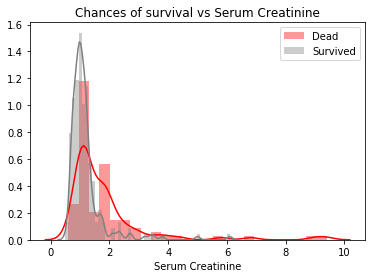

In [111]:
sns.distplot(df_death['Serum Creatinine'],color='Red')
sns.distplot(df_surv['Serum Creatinine'],color='Grey')
plt.title("Chances of survival vs Serum Creatinine")
plt.legend(('Dead','Survived'))
plt.plot()

## 3. Serum Sodium vs chances of survival

Decrese in serum sodium levels could decrease chances of survival

<b>H0: (mu)death-(mu)surv>=0

H1: (mu)death-(mu)surv<0

In [45]:
print(stats.shapiro(df_death['Serum Sodium']),stats.shapiro(df_surv['Serum Sodium']))

(0.9582131505012512, 0.003840430872514844) (0.9247754216194153, 1.0885426782181185e-08)


<b>pvalue for both datsets <<0.05 thus we can conclude that both datasets are not normally distributed

In [46]:
stats.mannwhitneyu(df_death['Serum Sodium'],df_surv['Serum Sodium'],alternative='less')

MannwhitneyuResult(statistic=7226.5, pvalue=0.00014637787318887364)

<b>Since pvalue<0.05 it falls in the rejection region. We reject H0.</b>

This concludes that with a reduction in serum sodium levels chances of survival is less

[]

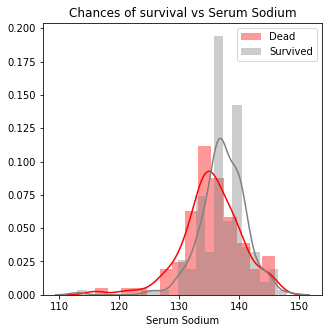

In [112]:
plt.figure(figsize=(5,5))
ax1=sns.distplot(df_death['Serum Sodium'],color='Red')
ax2=sns.distplot(df_surv['Serum Sodium'],color='Grey')
plt.legend(('Dead','Survived'))
plt.title("Chances of survival vs Serum Sodium")
plt.plot()

# Testing the risk for heart failure for ejection fraction, serum creatinine and serum sodium levels





<H3>Claim 1 :  People with ejection fraction less than 45 have a higher tendecy for heart failure </H3>

In [48]:
de = hdata.loc[hdata['Death Event']=='YES']
#record of all the patients who have died due to heart failure

In [113]:
#  Normality Test:

stats.shapiro(hdata['Ejection Fraction'])


(0.9473159313201904, 7.215433139862171e-09)

<b>pvalue<0.05. Reject null hypothesis.</b> Not a normal distribution. So, we use non parametric for one sample test -> <b>Wilcoxon Signed Rank Test </b>

In [50]:
M0 = 45           #hypothesized median

# H0: M >= 45
# H1: M < 45

alpha=0.05
diff = de['Ejection Fraction']-M0
test_statistic,pval = stats.wilcoxon(x=diff,alternative='less')
print(test_statistic,pval,alpha)

421.5 1.579482013989522e-11 0.05


The pvalue calculated is less than the level of significance. So, we reject the null hypothesis.<br><b>The claim that people with ejection fraction less than 45% have a higher tendency of heart failure is true.</b>

<BarContainer object of 3 artists>

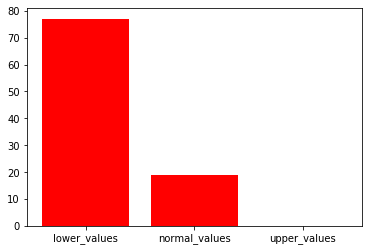

In [51]:
lower_values = de.loc[de['Ejection Fraction'] <45]
upper_values = de.loc[de['Ejection Fraction'] > 75]
normal_values = de.loc[(de['Ejection Fraction'] >= 45) & (de['Ejection Fraction'] <=75)]
x,y,z = lower_values.shape[0],normal_values.shape[0],upper_values.shape[0]

plt.bar(['lower_values','normal_values','upper_values'],[x,y,z],color='red')


We can see that most of the deaths have occurred for patients with ejection fraction less than than 45% (ie lower values)

<H3> Claim 2 : Risk for Heart failure increases with increased levels of serum creatinine (greater than 1.21 milligrams per deciliter)</H3>

In [52]:
#  Normality Test:

stats.shapiro(hdata['Serum Creatinine'])


(0.5514660477638245, 5.3927583038658e-27)

<b>pvalue < alpha . We reject the null hypothesis.</b> This data is not normally distributed. So, we use non parametric for one sample test -> <b>Wilcoxon Signed Rank Test </b>

In [53]:
M0 = 1.21           #hypothesized median

# H0: M <= 1.21
# H1: M > 1.21

alpha=0.05
diff = de['Serum Creatinine']-M0
test_statistic,pval = stats.wilcoxon(x=diff,alternative='greater')
print(test_statistic,pval,alpha)

3430.0 2.783674121129367e-05 0.05


The pvalue calculated is less than the level of significance. So, we reject the null hypothesis.<br><b>The claim that the risk for heart failure increases when serum creatinine levels are greater than 1.21 milligrams per deciliter can be admitted.</b>

<BarContainer object of 3 artists>

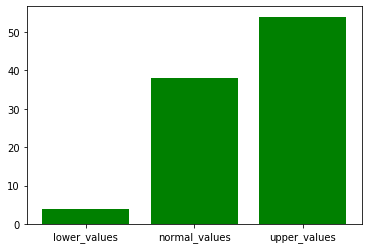

In [54]:
lower_values = de.loc[de['Serum Creatinine'] <0.84]
upper_values = de.loc[de['Serum Creatinine'] >1.21]
normal_values = de.loc[(de['Serum Creatinine'] >0.84) & (de['Serum Creatinine'] <1.21)]
x,y,z = lower_values.shape[0],normal_values.shape[0],upper_values.shape[0]

plt.bar(['lower_values','normal_values','upper_values'],[x,y,z],color='green')



We can see that most of the deaths have occurres for serum creatinine levels greater than 1.21 (ie upper values)

<H3> Claim 3 : Risk for Heart failure increases when serum sodium ion level is less than 137 milliequivalents per liter</H3>

In [55]:
#  Normality Test:

stats.shapiro(hdata['Serum Sodium'])

(0.9390263557434082, 9.210247564617191e-10)

<b>pvalue < alpha . We reject the null hypothesis.</b> This data is not normally distributed. So, we use non parametric for one sample test -> <b>Wilcoxon Signed Rank Test </b>

In [56]:
M0 = 137           #hypothesized median

# H0: M >= 135
# H1: M < 135

alpha=0.05
diff = de['Serum Sodium']-M0
test_statistic,pval = stats.wilcoxon(x=diff,alternative='less')
print(test_statistic,pval,alpha)

1258.0 0.0011141901119542943 0.05


The pvalue calculated is less than the level of significance. So, we reject the null hypothesis.<br><b>The claim that when a patients' serum sodium ion level is less than 137 milliequivalents per litre the risk for heart failure increases can be admitted.</b>

<BarContainer object of 3 artists>

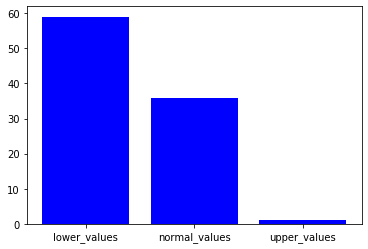

In [57]:
lower_values = de.loc[de['Serum Sodium'] <137]
upper_values = de.loc[de['Serum Sodium'] > 145]
normal_values = de.loc[(de['Serum Sodium'] >= 137) & (de['Serum Sodium'] <=145)]
x,y,z = lower_values.shape[0],normal_values.shape[0],upper_values.shape[0]

plt.bar(['lower_values','normal_values','upper_values'],[x,y,z],color='blue')

We can see that most of the deaths have occurred for serum sodium levels less than 137 (ie lower values)

# Test of Claim within the Normal Level

# 1. Testing the claim if the Deaths are caused due to Ejection Fraction within the normal Level

In [58]:
ej = hdata.loc[(hdata['Ejection Fraction']>45) & (hdata['Ejection Fraction']<75),['Ejection Fraction','Sex','Death Event']]
ej.head(10)

,Ejection Fraction,Sex,Death Event
7,60,MALE,YES
8,65,FEMALE,YES
15,50,MALE,YES
19,55,FEMALE,YES
23,60,MALE,NO
34,50,MALE,YES
36,50,MALE,YES
37,50,FEMALE,YES
43,50,MALE,NO
44,60,FEMALE,YES


In [59]:
m1=ols('Q("Ejection Fraction")~Q("Sex")+Q("Death Event")',data=ej).fit()
anova_table=anova_lm(m1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""Sex"")",1.0,47.130022,47.130022,1.713569,0.195869
"Q(""Death Event"")",1.0,1.391480,1.391480,0.050592,0.822855
Residual,56.0,1540.224261,27.504005,NaN,NaN


<b>Hypothesis for column: sex
    
H0: Normal Level of Ejection Fraction does not influence on the basis of Gender
    
H1: Normal Level of Ejection Fraction does influence on the basis of Gender 
                                               
In this we are checking whether the death have caused with the normal level of Ejection Fraction. Ejection Fraction (Normal Level) : 45 to 75                                               

In [114]:
fcrit_Gender = stats.f.isf(0.05,1,56)
print(fcrit_Gender)

4.012973377650135


<b>f_stat(Sex) < f_critical_Gender hence we fail to Reject Null Hypothesis ( Accept H0)</b>

Therefore we conclude that Normal Level of Ejection Fraction does not influence on the basis of Gender

<b>Hypothesis for column: death events
    
H0: Normal Level of Ejection Fraction does not influence Death Event
    
H1: Normal Level of Ejection Fraction does influence Death Event

In [115]:
fcrit_Death = stats.f.isf(0.05,1,56)
print(fcrit_Death)

4.012973377650135


<b>f_stat(Death Event) < f_critical_death hence we fail to Reject Null Hypothesis ( Accept H0)</b>

Therefore we conclude that Normal level of Ejection Fraction does not influence on Death Event

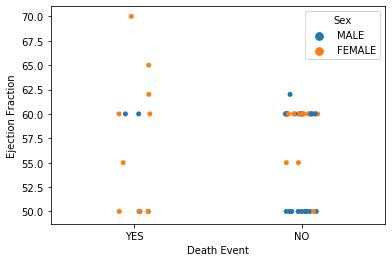

In [116]:
sns.stripplot(x=ej['Death Event'],y=ej['Ejection Fraction'],hue=ej['Sex'])
plt.show()

From above graph we can conclude that the deaths have been recorded in a nominal range as more patients have survived irrespective of their Gender

# 2. Testing the claim if the Deaths are caused due to Serum Creatinine within the normal Level

In [117]:
sc = hdata.loc[(hdata['Serum Creatinine']>0.6) & (hdata['Serum Creatinine']<1.3),['Serum Creatinine','Sex','Death Event']]
sc

,Serum Creatinine,Sex,Death Event
1,1.1,MALE,YES
6,1.2,MALE,YES
7,1.1,MALE,YES
11,0.9,MALE,YES
12,1.1,MALE,YES
...,...,...,...
292,1.0,MALE,NO
293,0.9,MALE,NO
294,1.1,MALE,NO
295,1.2,FEMALE,NO


In [118]:
m2=ols('Q("Serum Creatinine")~Q("Sex")+Q("Death Event")',data=sc).fit()
anova_table=anova_lm(m2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""Sex"")",1.0,0.018707,0.018707,0.808372,0.369740
"Q(""Death Event"")",1.0,0.191552,0.191552,8.277247,0.004474
Residual,190.0,4.396978,0.023142,NaN,NaN


<b>Hypothesis for column: sex
    
H0: Normal Level of Serum Creatinine does not influence on the basis of Gender
    
H1: Normal Level of Serum Creatinine does influence on the basis of Gender 

In [119]:
fcrit_Gender = stats.f.isf(0.05,1,190)
print(fcrit_Gender)

3.8908674287894316


<b>f_stat(Sex) < f_critical_Gender hence we fail to Reject Null Hypothesis ( Accept H0)</b>

Therefore we conclude that Normal Level of Serum Creatinine does not influence on the basis of Gender

<b>Hypothesis for column: Death Event
    
H0: Normal Level of Serum Creatinine does not influence on the basis of Death occurances
    
H1: Normal Level of Serum Creatinine does influence on the basis of Death occurances

In [66]:
fcrit_Death = stats.f.isf(0.05,1,190)
print(fcrit_Death)

3.8908674287894316


<b>f_stat(Death) > f_critical_Death hence we Reject Null Hypothesis</b>

Therefore we conclude that Serum Creatinine influence on the basis of Death occurances

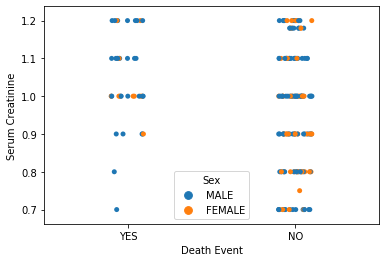

In [67]:
sns.stripplot(x=sc['Death Event'],y=sc['Serum Creatinine'],hue=sc['Sex'])

From above graph we can conclude that the deaths have been recorded in a nominal range as more patients have survived irrespective of their Gender but more deaths have been recorded compared to the cause of Ejection Fraction.

# 3. Testing the claim if the Deaths are caused due to Serum Sodium within the normal Level

In [68]:
ss = hdata.loc[(hdata['Serum Sodium']>130) & (hdata['Serum Sodium']<145),['Serum Sodium','Sex','Death Event']]
ss

,Serum Sodium,Sex,Death Event
1,136,MALE,YES
3,137,MALE,YES
5,132,MALE,YES
6,137,MALE,YES
7,131,MALE,YES
...,...,...,...
294,143,MALE,NO
295,139,FEMALE,NO
296,138,FEMALE,NO
297,140,MALE,NO


In [69]:
m3=ols('Q("Serum Sodium")~Q("Sex")+Q("Death Event")',data=ss).fit()
anova_table=anova_lm(m3)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""Sex"")",1.0,50.41678,50.416780,6.041945,0.014615
"Q(""Death Event"")",1.0,81.48578,81.485780,9.765252,0.001978
Residual,263.0,2194.59368,8.344463,NaN,NaN


<b>Hypothesis for column: sex
    
H0: Serum Sodium does not influence on the basis of Gender
    
H1: Serum Sodium influence on the basis of Gender 

In [70]:
fcrit_Gender = stats.f.isf(0.05,1,263)
print(fcrit_Gender)

3.877059347854797


<b>f_stat(Sex) > f_critical_Gender hence we Reject Null Hypothesis</b>

Therefore we conclude that Serum Sodium influence on the basis of Gender

<b>Hypothesis for column: Death Events
    
H0: Serum Sodium does not influence on the basis of Death Occurances
    
H1: Serum Sodium influence on the basis of Death Occurances

In [71]:
fcrit_Death = stats.f.isf(0.05,1,263)
print(fcrit_Death)

3.877059347854797


<b>f_stat(Death) > f_critical_Death hence we Reject Null Hypothesis</b>

Therefore we conclude that Serum Sodium influence on the basis of Death Occurances

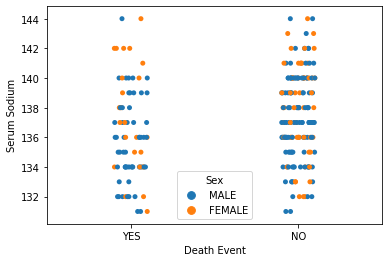

In [72]:
sns.stripplot(x=ss['Death Event'],y=ss['Serum Sodium'],hue=ss['Sex'])

From above graph we can conclude that the more deaths have been recorded and has taken an effect on Gender: Male compared to Female

# Survival Prediction Plot

# Analysis 1: Serum_Creatinine vs Ejection Fraction

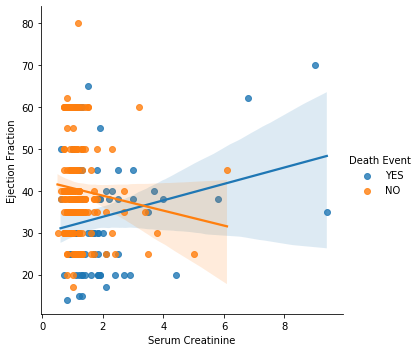

In [73]:
sns.lmplot(x="Serum Creatinine", y="Ejection Fraction", hue="Death Event", data=hdata)

From above plot, it is evident that the range of Deaths occurred for Serum Creatinine is 0.6 to 3 and for Ejection Fraction between 30 to 45.

<b>The linear Regression line indicates that increase in count on Ejection Fraction, nominal number of Deaths have been recorded within the normal level of 30 to 45.</b>

<b>Whereas there is a less chance of Survival rate due to decrease in linearity of curve within the normal level

# Analysis 2: Serum Sodium vs Ejection Fraction

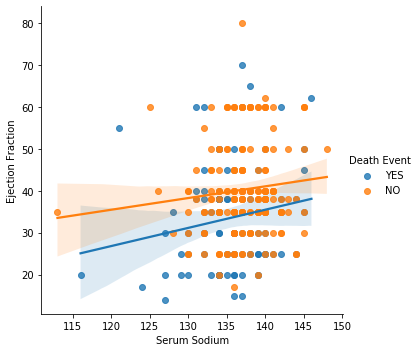

In [74]:
sns.lmplot(x="Serum Sodium", y="Ejection Fraction", hue="Death Event", data=hdata)

From above plot, it is evident that the range of Deaths occurred for Serum Sodium is 130 to 145 and for Ejection Fraction between 30 to 45.

<b>The linear Regression line indicates that increase in count on Ejection Fraction, nominal number of Deaths have been recorded within the normal level of 30 to 45.

Also there is a linear improvement on the Survival rate of patients within the normal level

# Test of Simulation 

In [87]:
def central_limit_theorem(sc, n_samples=300, sample_size=80):
    """ Use this function to demonstrate Central Limit Theorem. 
        data = 1D array, or a pd.Series
        n_samples = number of samples to be created
        sample_size = size of the individual sample """
    %matplotlib inline
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    min_value = 0                                                                   # minimum index of the data
    max_value = sc.count()                                                          # maximum index of the data
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size))  # set of random numbers with a specific size
        b[i] = sc[x].mean()                                                         # mean of each sample
    c = pd.DataFrame()
    c['sample'] = b.keys()                                                          # sample number 
    c['Mean'] = b.values()                                                          # mean of that particular sample
    plt.figure(figsize= (15,5))
    plt.subplot(1,2,2)
    sns.distplot(c.Mean)
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')
    plt.subplot(1,2,1)
    sns.distplot(sc)
    plt.title(f"Population Distribution. \n \u03bc = {round(sc.mean(), 3)} & \u03C3 = {round(sc.std(),3)}")
    plt.show()

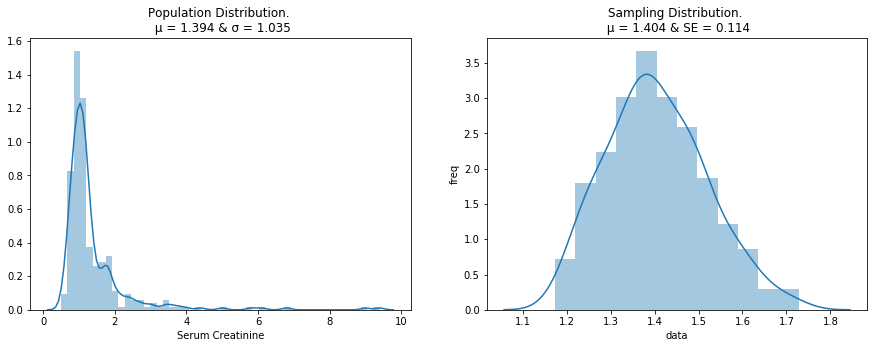

In [88]:
central_limit_theorem(hdata['Serum Creatinine'],n_samples = 300, sample_size = 80)

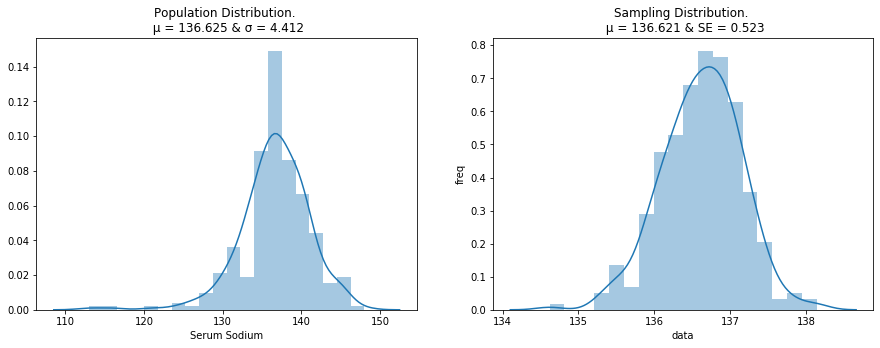

In [89]:
central_limit_theorem(hdata['Serum Sodium'],n_samples = 300, sample_size = 60)

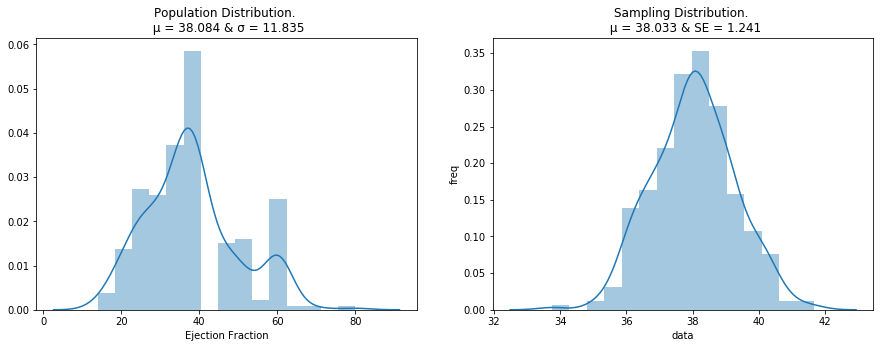

In [90]:
central_limit_theorem(hdata['Ejection Fraction'],n_samples = 300, sample_size = 80)

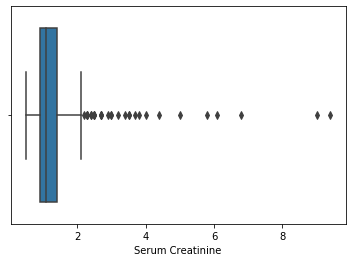

In [79]:
sns.boxplot(x=hdata['Serum Creatinine'])

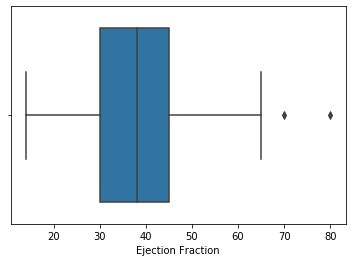

In [80]:
sns.boxplot(x=hdata['Ejection Fraction'])

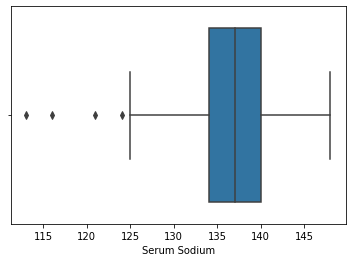

In [81]:
sns.boxplot(x=hdata['Serum Sodium'])

# Conclusion for Statistical Analysis

<b>Descriptive statistics</b> were calculated to determine the clinical characteristics and outcomes of the registry population.

Data were presented as <b>numbers</b> and <b>frequencies</b> for categorical variables and as mean ± standard deviation with interquartile range for continuous variables.

For the comparison between groups like Normality, Shapiro, Pearson, Hypothesis Testing <b>(Mann-Whitley U Test, Wilcoxon Signed Rank Test, 2 Way ANOVA)</b> was used for categorical variables.

Concordance was expressed as the percentage agreement. <b>Pearson’s correlation</b> was used to calculate the Correlation between the <b>Numerical Columns</b>.

In our work, the fact that our Biostatistics analysis <b>selected ejection fraction</b> and <b>serum creatinine</b> as the two most relevant features predicted the Survival of the Patient.

Additional information about the physical features of the patients <b>(height, weight, body mass index, etc.)</b> ,<b>Geographical Region</b> had been available and their <b>family history</b> of Heart Disease would have been useful to predict more accurate additional risk factors for cardiovascular health diseases. 
